
##### M13_Challenge_KonradK_venture_funding_with_deep_learning.ipynb
## Konrad Kozicki
### UCB-VIRT-FIN-PT-12-2020-U-B-TTH
# Module 13 Challenge Submission - Sandbox_01
---

# Venture Funding with Deep Learning


In [1]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv(
    Path("./Resources/applicants_data.csv")
)

# # Review the DataFrame
# applicant_data_df.head()

In [3]:
# Review the data types associated with the columns
applicant_data_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

>>>> 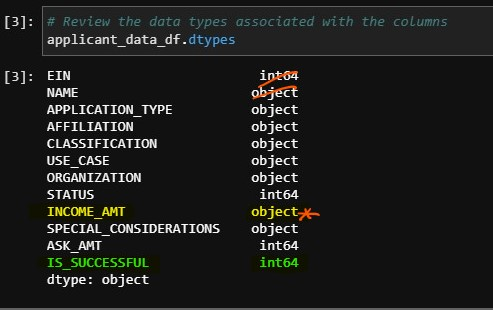

In [4]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns = ["EIN", "NAME"])

# # Review the DataFrame
# applicant_data_df[:5]

In [5]:
# Create a list of categorical variables 
categorical_variables = list(applicant_data_df.dtypes[applicant_data_df.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [6]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [7]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df[categorical_variables])

In [8]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables)
)

# # Review the DataFrame
# encoded_df.head()

In [9]:
numerical_variables_df = applicant_data_df.drop(columns = categorical_variables)

# # Review the DataFrame
# numerical_variables_df.head()

In [10]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
fully_encoded_df = pd.concat(
    [
        numerical_variables_df,
        encoded_df
    ],
    axis=1
)

# # Review the Dataframe
# fully_encoded_df.head()

In [11]:
# applicant_data_df.dtypes

In [12]:
fully_encoded_df.dtypes

STATUS                        int64
ASK_AMT                       int64
IS_SUCCESSFUL                 int64
APPLICATION_TYPE_T10        float64
APPLICATION_TYPE_T12        float64
                             ...   
INCOME_AMT_25000-99999      float64
INCOME_AMT_50M+             float64
INCOME_AMT_5M-10M           float64
SPECIAL_CONSIDERATIONS_N    float64
SPECIAL_CONSIDERATIONS_Y    float64
Length: 117, dtype: object

In [13]:
# Define the target set y using the IS_SUCCESSFUL column
y = fully_encoded_df["IS_SUCCESSFUL"]

# # Display a sample of y
# y[:5]

In [14]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = fully_encoded_df.drop(columns=["IS_SUCCESSFUL"])


# # Review the features DataFrame
# X.head()

In [15]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [16]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


### Alternative Model 5

In [17]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

116

In [18]:
# Define the number of neurons in the output layer
number_output_neurons_A5 = 1

In [19]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A5 =  (number_input_features + number_output_neurons_A5) // 2
# Review the number hidden nodes in the first layer
hidden_nodes_layer1_A5

58

In [20]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A5 = (hidden_nodes_layer1_A5 + number_output_neurons_A5) // 2
# Review the number hidden nodes in the second layer
hidden_nodes_layer2_A5

29

In [21]:
# Create the Sequential model instance
nn_A5 = Sequential() 

In [22]:
# Add the first hidden layer
nn_A5.add(Dense(units=hidden_nodes_layer1_A5, input_dim=number_input_features, activation="relu"))

In [23]:
# Add the second hidden layer
nn_A5.add(Dense(units=hidden_nodes_layer2_A5, activation="relu"))

In [24]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn_A5.add(Dense(units=number_output_neurons_A5, activation="sigmoid"))

In [25]:
# Display the Sequential model summary
nn_A5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 58)                6786      
_________________________________________________________________
dense_1 (Dense)              (None, 29)                1711      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 30        
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the Sequential model
nn_A5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Fit the model using 50 epochs and the training data
fit_model_A5 = nn_A5.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 1s 832us/step - loss: 0.6019 - accuracy: 0.6960
Epoch 2/50
804/804 [==============================] - 1s 847us/step - loss: 0.5552 - accuracy: 0.7322
Epoch 3/50
804/804 [==============================] - 1s 924us/step - loss: 0.5494 - accuracy: 0.7283
Epoch 4/50
804/804 [==============================] - 1s 907us/step - loss: 0.5459 - accuracy: 0.7357
Epoch 5/50
804/804 [==============================] - 1s 948us/step - loss: 0.5459 - accuracy: 0.7339
Epoch 6/50
804/804 [==============================] - 1s 883us/step - loss: 0.5418 - accuracy: 0.7351
Epoch 7/50
804/804 [==============================] - 1s 860us/step - loss: 0.5368 - accuracy: 0.7413
Epoch 8/50
804/804 [==============================] - 1s 900us/step - loss: 0.5439 - accuracy: 0.7315
Epoch 9/50
804/804 [==============================] - 1s 934us/step - loss: 0.5392 - accuracy: 0.7356
Epoch 10/50
804/804 [==============================] - 1s 939us/step - loss: 0.539

### Alternative Model 6

In [28]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

116

In [29]:
# Define the number of neurons in the output layer
number_output_neurons_A6 = 1

In [30]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A6 =  (number_input_features + number_output_neurons_A6) // 2
# Review the number hidden nodes in the first layer
hidden_nodes_layer1_A6

58

In [31]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer2_A6 =  (hidden_nodes_layer1_A6 + number_output_neurons_A6) // 2
# Review the number hidden nodes in the first layer
hidden_nodes_layer2_A6

29

In [32]:
# Create the Sequential model instance
nn_A6 = Sequential()

In [33]:
# First hidden layer
nn_A6.add(Dense(units=hidden_nodes_layer1_A6, input_dim=number_input_features, activation="relu"))
# Second hidden layer
nn_A6.add(Dense(units=hidden_nodes_layer2_A6, activation="relu"))
# Output layer
nn_A6.add(Dense(units=number_output_neurons_A6, activation="sigmoid"))
# Check the structure of the model
nn_A6.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 58)                6786      
_________________________________________________________________
dense_4 (Dense)              (None, 29)                1711      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 30        
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compile the Sequential model
nn_A6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
# Fit the model using 50 epochs and the training data
fit_model_A6 = nn_A6.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 1s 847us/step - loss: 0.6075 - accuracy: 0.6939
Epoch 2/50
804/804 [==============================] - 1s 795us/step - loss: 0.5571 - accuracy: 0.7275
Epoch 3/50
804/804 [==============================] - 1s 808us/step - loss: 0.5455 - accuracy: 0.7313
Epoch 4/50
804/804 [==============================] - 1s 837us/step - loss: 0.5482 - accuracy: 0.7296
Epoch 5/50
804/804 [==============================] - 1s 803us/step - loss: 0.5459 - accuracy: 0.73220s - loss: 0.549
Epoch 6/50
804/804 [==============================] - 1s 776us/step - loss: 0.5443 - accuracy: 0.7334
Epoch 7/50
804/804 [==============================] - 1s 826us/step - loss: 0.5427 - accuracy: 0.7360
Epoch 8/50
804/804 [==============================] - 1s 800us/step - loss: 0.5417 - accuracy: 0.7342
Epoch 9/50
804/804 [==============================] - 1s 791us/step - loss: 0.5378 - accuracy: 0.7378
Epoch 10/50
804/804 [==============================] - 1s 865us/st

#### Alternative Model 7

In [36]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

116

In [37]:
# Define the number of neurons in the output layer
number_output_neurons_A7 = 1

In [38]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A7 = (number_input_features + number_output_neurons_A7) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A7

58

In [39]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A7 = (hidden_nodes_layer1_A7 + number_output_neurons_A7) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer2_A7

29

In [40]:
# Create the Sequential model instance
nn_A7 = Sequential()

In [41]:
# First hidden layer
nn_A7.add(Dense(units=hidden_nodes_layer1_A7, input_dim=number_input_features, activation="relu"))
# Second hidden layer
nn_A7.add(Dense(units=hidden_nodes_layer2_A7, activation="relu"))
# Output layer
nn_A7.add(Dense(units=number_output_neurons_A7, activation="sigmoid"))
# Check the structure of the model
nn_A7.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 58)                6786      
_________________________________________________________________
dense_7 (Dense)              (None, 29)                1711      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 30        
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile the model
nn_A7.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
# Fit the model
fit_model_A7 = nn_A7.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 1s 770us/step - loss: 0.5961 - accuracy: 0.7058
Epoch 2/50
804/804 [==============================] - 1s 784us/step - loss: 0.5555 - accuracy: 0.7285
Epoch 3/50
804/804 [==============================] - 1s 813us/step - loss: 0.5514 - accuracy: 0.7301
Epoch 4/50
804/804 [==============================] - 1s 779us/step - loss: 0.5489 - accuracy: 0.7313
Epoch 5/50
804/804 [==============================] - 1s 785us/step - loss: 0.5468 - accuracy: 0.7308
Epoch 6/50
804/804 [==============================] - 1s 828us/step - loss: 0.5407 - accuracy: 0.7378
Epoch 7/50
804/804 [==============================] - 1s 778us/step - loss: 0.5431 - accuracy: 0.7340
Epoch 8/50
804/804 [==============================] - 1s 769us/step - loss: 0.5455 - accuracy: 0.7324
Epoch 9/50
804/804 [==============================] - 1s 827us/step - loss: 0.5412 - accuracy: 0.7339
Epoch 10/50
804/804 [==============================] - 1s 770us/step - loss: 0.540

#### Alternative Model 8

In [44]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

116

In [45]:
# Define the number of neurons in the output layer
number_output_neurons_A8 = 1

In [46]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A8 = (number_input_features + number_output_neurons_A8) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A8

58

In [47]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A8 = (hidden_nodes_layer1_A8 + number_output_neurons_A8) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer2_A8

29

In [48]:
# Create the Sequential model instance
nn_A8 = Sequential()

In [49]:
# First hidden layer
nn_A8.add(Dense(units=hidden_nodes_layer1_A8, input_dim=number_input_features, activation="relu"))
# Second hidden layer
nn_A8.add(Dense(units=hidden_nodes_layer2_A8, activation="relu"))
# Output layer
nn_A8.add(Dense(units=number_output_neurons_A8, activation="sigmoid"))
# Check the structure of the model
nn_A8.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 58)                6786      
_________________________________________________________________
dense_10 (Dense)             (None, 29)                1711      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 30        
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Compile the model
nn_A8.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [51]:
# Fit the model
fit_model_A8 = nn_A8.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 1s 802us/step - loss: 0.5918 - accuracy: 0.7038
Epoch 2/50
804/804 [==============================] - 1s 839us/step - loss: 0.5486 - accuracy: 0.7328
Epoch 3/50
804/804 [==============================] - 1s 803us/step - loss: 0.5523 - accuracy: 0.7270
Epoch 4/50
804/804 [==============================] - 1s 802us/step - loss: 0.5474 - accuracy: 0.7335
Epoch 5/50
804/804 [==============================] - 1s 835us/step - loss: 0.5473 - accuracy: 0.7308
Epoch 6/50
804/804 [==============================] - 1s 792us/step - loss: 0.5397 - accuracy: 0.73820s - loss: 0.5
Epoch 7/50
804/804 [==============================] - 1s 774us/step - loss: 0.5408 - accuracy: 0.7355
Epoch 8/50
804/804 [==============================] - 1s 834us/step - loss: 0.5424 - accuracy: 0.7353
Epoch 9/50
804/804 [==============================] - 1s 790us/step - loss: 0.5416 - accuracy: 0.7343
Epoch 10/50
804/804 [==============================] - 1s 787us/step

### Alternative Model 9

In [52]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

116

In [53]:
# Define the number of neurons in the output layer
number_output_neurons_A9 = 1

In [54]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A9 =  (number_input_features + number_output_neurons_A9) // 2
# Review the number hidden nodes in the first layer
hidden_nodes_layer1_A9

58

In [55]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer2_A9 =  (hidden_nodes_layer1_A9 + number_output_neurons_A9) // 2
# Review the number hidden nodes in the first layer
hidden_nodes_layer2_A9

29

In [56]:
# Create the Sequential model instance
nn_A9 = Sequential()

In [57]:
# First hidden layer
nn_A9.add(Dense(units=hidden_nodes_layer1_A9, input_dim=number_input_features, activation="relu"))
# Second hidden layer
nn_A9.add(Dense(units=hidden_nodes_layer2_A9, activation="relu"))
# Output layer
nn_A9.add(Dense(units=number_output_neurons_A9, activation="sigmoid"))
# Check the structure of the model
nn_A9.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 58)                6786      
_________________________________________________________________
dense_13 (Dense)             (None, 29)                1711      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 30        
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Compile the Sequential model
nn_A9.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [59]:
# Fit the model using 50 epochs and the training data
fit_model_A9 = nn_A9.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 1s 771us/step - loss: 0.5961 - accuracy: 0.7074
Epoch 2/50
804/804 [==============================] - 1s 765us/step - loss: 0.5494 - accuracy: 0.7362
Epoch 3/50
804/804 [==============================] - 1s 795us/step - loss: 0.5448 - accuracy: 0.7311
Epoch 4/50
804/804 [==============================] - 1s 804us/step - loss: 0.5478 - accuracy: 0.7327
Epoch 5/50
804/804 [==============================] - 1s 782us/step - loss: 0.5464 - accuracy: 0.7321
Epoch 6/50
804/804 [==============================] - 1s 797us/step - loss: 0.5468 - accuracy: 0.7314
Epoch 7/50
804/804 [==============================] - 1s 804us/step - loss: 0.5402 - accuracy: 0.7365
Epoch 8/50
804/804 [==============================] - 1s 777us/step - loss: 0.5399 - accuracy: 0.7386
Epoch 9/50
804/804 [==============================] - 1s 765us/step - loss: 0.5409 - accuracy: 0.7335
Epoch 10/50
804/804 [==============================] - 1s 868us/step - loss: 0.541

### Step 2: After finishing your models, display the accuracy scores achieved by each model, and compare the results.

In [60]:
print("Alternative Model 5 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A5.evaluate(X_test_scaled,y_test,verbose=1)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 5 Results
268/268 [==============================] - 0s 615us/step - loss: 0.5534 - accuracy: 0.7299
Loss: 0.5534085631370544, Accuracy: 0.729912519454956


<AxesSubplot:title={'center':'model_accuracy: A5'}>

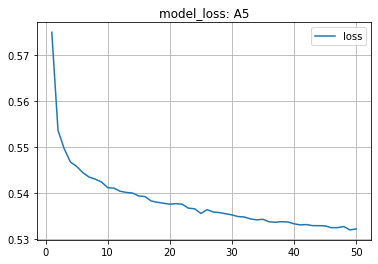

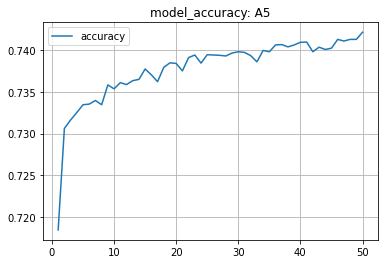

In [61]:
model_plot = pd.DataFrame(fit_model_A5.history, index=range(1, len(fit_model_A5.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A5")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A5")

In [62]:
print("Alternative Model 6 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A6.evaluate(X_test_scaled,y_test,verbose=1)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 6 Results
268/268 [==============================] - 0s 531us/step - loss: 0.5571 - accuracy: 0.7271
Loss: 0.5571077466011047, Accuracy: 0.7271137237548828


<AxesSubplot:title={'center':'model_accuracy: A6'}>

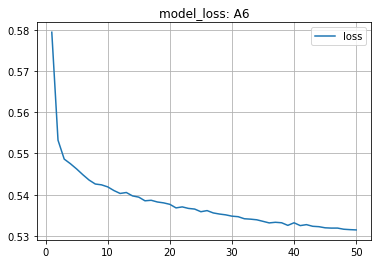

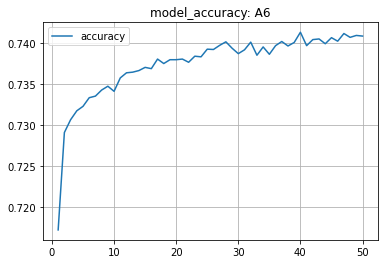

In [63]:
model_plot = pd.DataFrame(fit_model_A6.history, index=range(1, len(fit_model_A6.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A6")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A6")

In [64]:
print("Alternative Model 7 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A7.evaluate(X_test_scaled,y_test,verbose=1)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 7 Results
268/268 [==============================] - 0s 539us/step - loss: 0.5535 - accuracy: 0.7319
Loss: 0.553504467010498, Accuracy: 0.7318950295448303


<AxesSubplot:title={'center':'model_accuracy: A7'}>

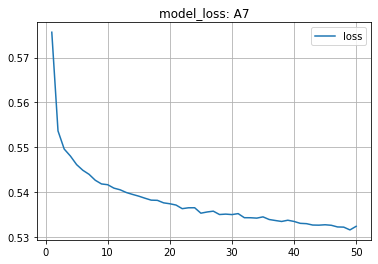

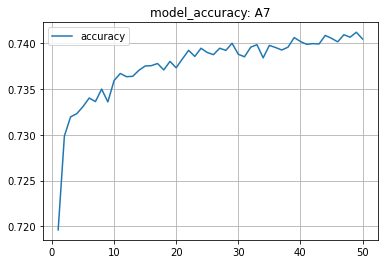

In [65]:
model_plot = pd.DataFrame(fit_model_A7.history, index=range(1, len(fit_model_A7.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A7")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A7")

In [66]:
print("Alternative Model 8 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A8.evaluate(X_test_scaled,y_test,verbose=1)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 8 Results
268/268 [==============================] - 0s 607us/step - loss: 0.5586 - accuracy: 0.7293
Loss: 0.5586093068122864, Accuracy: 0.7293294668197632


<AxesSubplot:title={'center':'model_accuracy: A8'}>

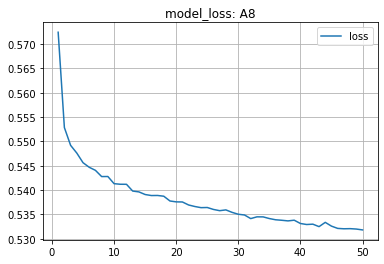

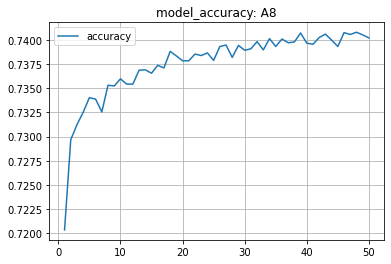

In [67]:
model_plot = pd.DataFrame(fit_model_A8.history, index=range(1, len(fit_model_A8.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A8")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A8")

In [68]:
print("Alternative Model 9 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A9.evaluate(X_test_scaled,y_test,verbose=1)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 9 Results
268/268 [==============================] - 0s 539us/step - loss: 0.5532 - accuracy: 0.7310
Loss: 0.5532149076461792, Accuracy: 0.7309620976448059


<AxesSubplot:title={'center':'model_accuracy: A9'}>

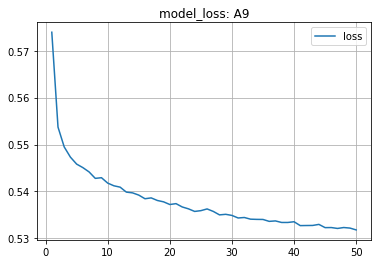

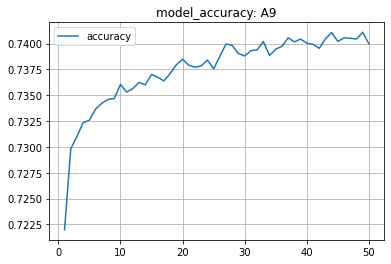

In [69]:
model_plot = pd.DataFrame(fit_model_A9.history, index=range(1, len(fit_model_A9.history["loss"]) + 1))
model_plot.plot(y="loss", title="model_loss: A9", grid=True)
model_plot.plot(y="accuracy", title="model_accuracy: A9", grid=True)

### Step 3: Save each of your alternative models as an HDF5 file.


In [70]:
# Set the file path for the fifth alternative model
file_path = Path("./Resources/AlphabetSoup_A5.h5")
# Export your model to a HDF5 file
nn_A5.save(file_path)

In [71]:
# Set the file path for the sixth alternative model
file_path = Path("./Resources/AlphabetSoup_A6.h5")
# Export your model to a HDF5 file
nn_A6.save(file_path)

In [72]:
# Set the file path for the seventh alternative model
file_path = Path("./Resources/AlphabetSoup_A7.h5")
# Export your model to a HDF5 file
nn_A7.save(file_path)

In [73]:
# Set the file path for the eighth alternative model
file_path = Path("./Resources/AlphabetSoup_A8.h5")
# Export your model to a HDF5 file
nn_A8.save(file_path)

In [74]:
# Set the file path for the ninth alternative model
file_path = Path("./Resources/AlphabetSoup_A9.h5")
# Export your model to a HDF5 file
nn_A9.save(file_path)